In [2]:
!kaggle datasets download -d arnaudeq/cats-vs-dogs-1000

Dataset URL: https://www.kaggle.com/datasets/arnaudeq/cats-vs-dogs-1000
License(s): unknown
 98% 174M/177M [00:08<00:00, 21.9MB/s]
100% 177M/177M [00:08<00:00, 20.9MB/s]


In [3]:
!unzip -q cats-vs-dogs-1000.zip -d dataset

In [4]:
import glob

cats_train = glob.glob('/content/dataset/dogs_cats_sample_1000/train/cats/*.jpg')
dogs_train = glob.glob('/content/dataset/dogs_cats_sample_1000/train/dogs/*.jpg')

cats_val = glob.glob('/content/dataset/dogs_cats_sample_1000/valid/cats/*.jpg')
dogs_val = glob.glob('/content/dataset/dogs_cats_sample_1000/valid/dogs/*.jpg')

In [5]:
# from sklearn.model_selection import train_test_split

In [6]:
# cats_train, cats_val = train_test_split(cats_train, test_size=0.2)
# dogs_train, dogs_val = train_test_split(dogs_train, test_size=0.2)

In [7]:
len(cats_train), len(dogs_train), len(cats_val), len(dogs_val)

(1000, 1000, 1002, 998)

In [8]:
import matplotlib.pyplot as plt
import numpy as np

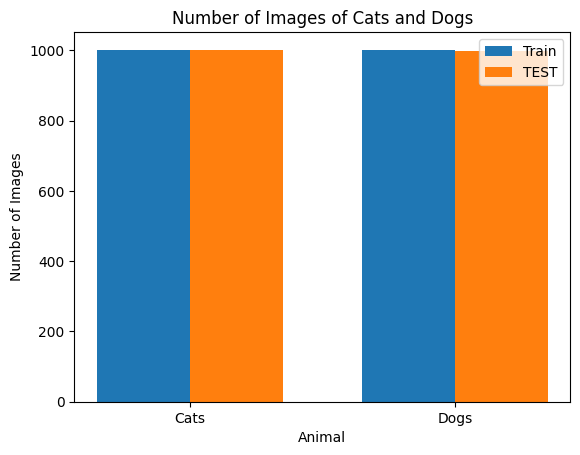

In [9]:
# Define the counts for cats and dogs in validation and train sets
cats_validation_count = len(cats_val)
dogs_validation_count = len(dogs_val)
cats_train_count = len(cats_train)
dogs_train_count = len(dogs_train)

# Create the labels for the x-axis
labels = ['Cats', 'Dogs']

# Create the counts for validation and train sets
validation_counts = [cats_validation_count, dogs_validation_count]
train_counts = [cats_train_count, dogs_train_count]

# Set the positions and width of the bars
positions = np.arange(len(labels))
bar_width = 0.35

# Plot the bars
plt.bar(positions - bar_width/2, train_counts, bar_width, label='Train')
plt.bar(positions + bar_width/2, validation_counts, bar_width, label='TEST')

# Set the labels and title
plt.xlabel('Animal')
plt.ylabel('Number of Images')
plt.title('Number of Images of Cats and Dogs')

# Set the x-axis tick labels
plt.xticks(positions, labels)

plt.legend()

# Show the plot
plt.show()

In [10]:
# import os
# import shutil

# def move_images(image_list, dest_folder):
#     for image_path in image_list:
#         # Extract the image name from the path
#         image_name = os.path.basename(image_path)

#         # Create the destination path
#         destination_path = os.path.join(dest_folder, image_name)

#         # Move the image
#         shutil.move(image_path, destination_path)

# # Create the destination folders if they don't exist
# os.makedirs('train/Cat', exist_ok=True)
# os.makedirs('train/Dog', exist_ok=True)
# os.makedirs('val/Cat', exist_ok=True)
# os.makedirs('val/Dog', exist_ok=True)

# # Move the images
# move_images(cats_train, 'train/Cat')
# move_images(dogs_train, 'train/Dog')
# move_images(cats_val, 'val/Cat')
# move_images(dogs_val, 'val/Dog')

In [11]:
# !rm -rf dataset

In [12]:
# Define the root folder path
root_folder = '/content/dataset/dogs_cats_sample_1000/train/'

# Define the patterns to match image files
image_patterns = ['**/*.png', '**/*.jpeg', '**/*.jpg']

# Use glob.glob() to find the paths to image files with multiple extensions
image_paths = []
for pattern in image_patterns:
    image_paths.extend(glob.glob(root_folder + '/' + pattern, recursive=True))

len(image_paths)

2000

**`Testing how images look after Normalization`**

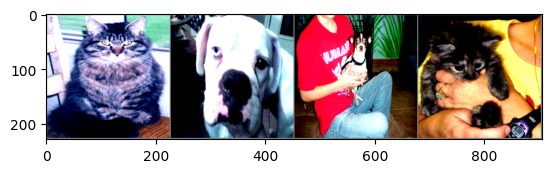

cats dogs dogs cats


In [13]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import torchvision

# Define the transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to the size your model expects
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])

# Create the dataset
training_folder = '/content/dataset/dogs_cats_sample_1000/train'
train_dataset = ImageFolder(root=training_folder, transform=transform)

# Create a DataLoader
train_dataloader = DataLoader(train_dataset, batch_size=4, shuffle=True)

# Get a batch of training data
dataiter = iter(train_dataloader)
images, labels = next(dataiter)

# Function to show an image
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Show images
imshow(torchvision.utils.make_grid(images))

# Print labels
print(' '.join(f'{train_dataset.classes[labels[j]]}' for j in range(4)))


In [14]:
from PIL import Image
import numpy as np
import pandas as pd

# Initialize empty lists
image_heights = []
image_widths = []
image_channels = []
valid_image_paths = []

# Iterate over image paths
for path in image_paths:
    try:
        image = Image.open(path)
        shape = np.array(image).shape
        if len(shape) >= 3:
            height, width, channels = shape[:3]
        else:
            height, width = shape[:2]
            channels = 1

        image_heights.append(height)
        image_widths.append(width)
        image_channels.append(channels)
        valid_image_paths.append(path)

    except (IOError, OSError) as e:
        os.remove(path)
        print(f"Error opening image at path: {path}")
        # Handle the error as needed (e.g., logging, skipping the image, etc.)

# Create the DataFrame
Images_metadata = pd.DataFrame({
    'Images': valid_image_paths,
    'Image height': image_heights,
    'Image width': image_widths,
    'Image channels': image_channels
})


In [15]:
len(image_paths)

2000

In [16]:
len(Images_metadata)

2000

In [17]:
Images_metadata.head()

Images  Image height  \
0  /content/dataset/dogs_cats_sample_1000/train/d...           155   
1  /content/dataset/dogs_cats_sample_1000/train/d...           375   
2  /content/dataset/dogs_cats_sample_1000/train/d...           336   
3  /content/dataset/dogs_cats_sample_1000/train/d...           499   
4  /content/dataset/dogs_cats_sample_1000/train/d...           212   

   Image width  Image channels  
0          187               3  
1          499               3  
2          447               3  
3          375               3  
4          255               3

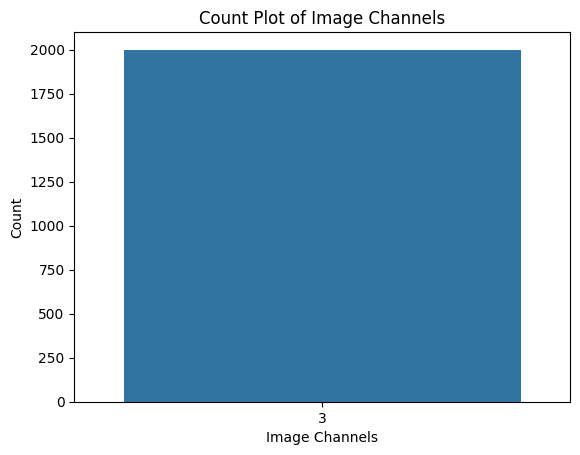

In [18]:
import seaborn as sns

sns.countplot(x='Image channels', data=Images_metadata)
plt.xlabel('Image Channels')
plt.ylabel('Count')
plt.title('Count Plot of Image Channels')
plt.show()

In [19]:
Images_metadata.describe()

Image height  Image width  Image channels
count   2000.000000   2000.00000          2000.0
mean     361.095000    403.90250             3.0
std       95.048283    109.94095             0.0
min       39.000000     54.00000             3.0
25%      300.000000    320.00000             3.0
50%      374.000000    448.00000             3.0
75%      419.000000    499.00000             3.0
max      500.000000    500.00000             3.0

In [20]:
# error_causing_images = ['/content/train/Cat/666.jpg', '/content/train/Dog/11702.jpg']

# for image in error_causing_images:
#   try:
#     image_paths.remove(image)
#     os.remove(image)
#   except Exception as e:
#     print(image, e)
#     pass

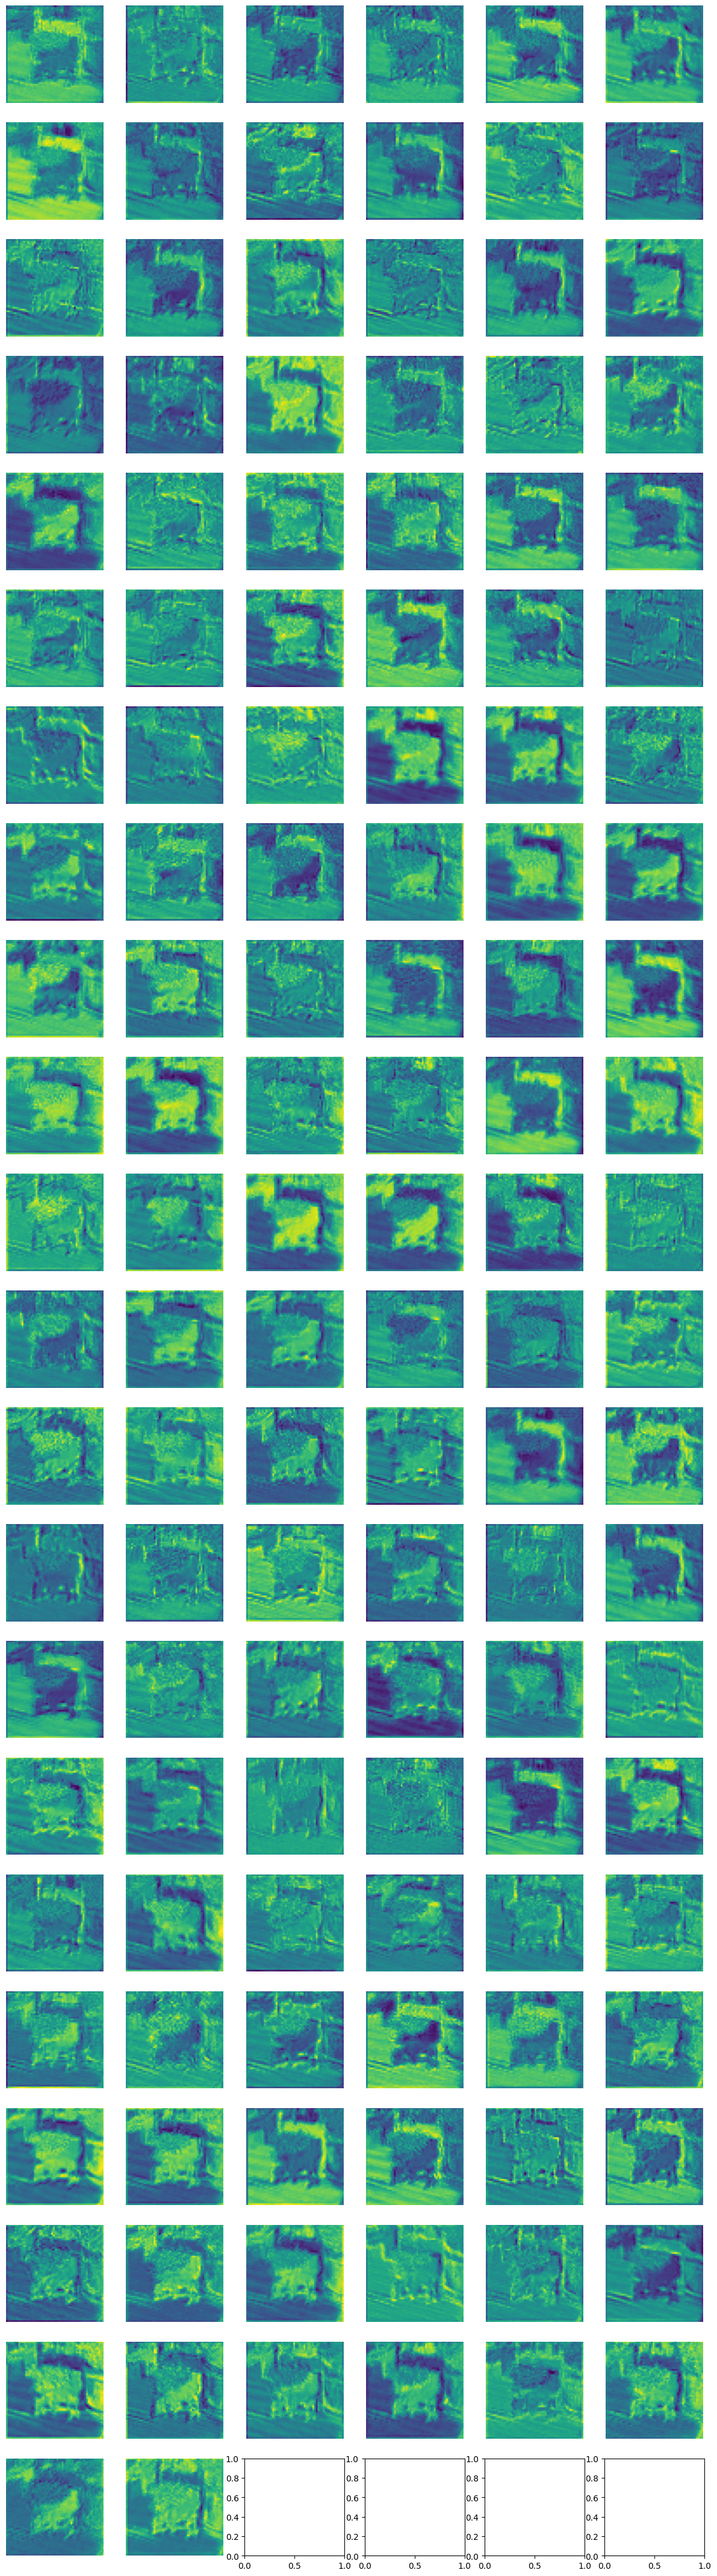

In [21]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import torch.nn as nn
import torch.nn.functional as F

# Define the transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to the size your model expects
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])

# Create the dataset
training_folder = '/content/dataset/dogs_cats_sample_1000/train'
train_dataset = ImageFolder(root=training_folder, transform=transform)

# Create a DataLoader
train_dataloader = DataLoader(train_dataset, batch_size=4, shuffle=True)

# Define a simple CNN model for demonstration
class SimpleCNN(nn.Module):
    def __init__(self):
      super(SimpleCNN, self).__init__()
      # Convolutional layers
      self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
      self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
      self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
      self.conv3 = nn.Conv2d(64, 128, 3, padding=1)

      # Fully connected layers
      self.fc1 = nn.Linear(512 * 7 * 7, 512)
      self.fc2 = nn.Linear(512, 2)

    def forward(self, x):
          x = self.pool(F.relu(self.conv1(x)))
          x = self.pool(F.relu(self.conv2(x)))
          x = self.pool(F.relu(self.conv3(x)))

          x = x.view(-1, 512 * 7 * 7)
          x = F.relu(self.fc1(x))
          x = self.fc2(x)
          return x

model = SimpleCNN()

# Hook to extract features
activations = {}

def get_activation(name):
    def hook(model, input, output):
        activations[name] = output.detach()
    return hook

model.conv1.register_forward_hook(get_activation('conv1'))
model.conv2.register_forward_hook(get_activation('conv2'))
model.conv3.register_forward_hook(get_activation('conv3'))

# Get a batch of training data
dataiter = iter(train_dataloader)
images, labels = next(dataiter)

# Forward pass through the network
outputs = model(images)

# Visualize the feature maps
def visualize_activation(activation, n_cols=6):
    n_features = activation.shape[1]
    n_rows = (n_features // n_cols) + 1
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 2.5))
    for i in range(n_features):
        row = i // n_cols
        col = i % n_cols
        ax = axes[row, col]
        ax.imshow(activation[0, i].cpu().numpy(), cmap='viridis')
        ax.axis('off')
    plt.show()

# # Visualize the first convolutional layer's activations
# visualize_activation(activations['conv1'])

# # Visualize the second convolutional layer's activations
# visualize_activation(activations['conv2'])
# visualize_activation(activations['conv3'])
visualize_activation(activations['conv3'])


In [22]:
import pandas as pd

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader

import torchvision
from torchvision.datasets import ImageFolder
from torchvision import transforms

In [23]:
training_folder = "/content/dataset/dogs_cats_sample_1000/train"
validation_folder = "/content/dataset/dogs_cats_sample_1000/valid"

In [24]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [25]:
# Create the ImageFolder dataset for calculating mean and std
train_dataset_s = ImageFolder(root=training_folder, transform=transform)

# Create a DataLoader for the training dataset
train_dataloader_s = DataLoader(train_dataset_s, batch_size=64, shuffle=True)

# Calculate the mean and standard deviation
mean_s = 0.
std_s = 0.
total_samples_s = 0

for images_s, _ in train_dataloader_s:
  try:
    batch_samples_s = images_s.size(0)
    images_s = images_s.view(batch_samples_s, images_s.size(1), -1)
    mean_s += images_s.mean(2).sum(0)
    std_s += images_s.std(2).sum(0)
    total_samples_s += batch_samples_s
  except:
    pass
mean_s /= total_samples_s
std_s /= total_samples_s

print("Mean:", mean_s)
print("Standard Deviation:", std_s)

Mean: tensor([-0.0951, -0.1067, -0.0451])
Standard Deviation: tensor([1.0473, 1.0377, 1.0177])


In [26]:
training_dataset = ImageFolder(root=training_folder, transform=transform)
validation_data = ImageFolder(root=validation_folder, transform=transform)

In [27]:
validation_size = int(0.5 * len(validation_data))  # 50% for validation
test_size = len(validation_data) - validation_size  # Remaining 50% (40% add to training and 10% for testing)
validation_dataset, test_dataset = torch.utils.data.random_split(validation_data, [validation_size, test_size])

In [28]:
add_to_training = int(0.8 * len(test_dataset))  # 80% for training
test_size = len(test_dataset) - add_to_training  # Remaining 20% for testing

In [29]:
add_to_training_dataset, test_dataset = torch.utils.data.random_split(test_dataset, [add_to_training, test_size])

In [30]:
training_dataset = training_dataset + add_to_training_dataset

In [31]:
# Create the DataLoader for training
train_dataloader = DataLoader(training_dataset, batch_size=32, shuffle=True)

# Create the DataLoader for validation
valid_dataloader = DataLoader(validation_dataset, batch_size=1, shuffle=False)


In [32]:
test_dataloader = DataLoader(test_dataset, batch_size=1)

In [33]:
np.array(Image.open(image_paths[0])).shape

(155, 187, 3)

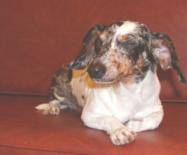

In [34]:
Image.open(image_paths[0])

In [60]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class MyCNN(nn.Module):
    def __init__(self):
        super(MyCNN, self).__init__()
        # Convolutional layers
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)

        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Placeholder for the size calculation
        self.fc_input_size = None
        self.fc1 = nn.Linear(128 * 8 * 8, 512)  # This will be updated dynamically
        self.fc2 = nn.Linear(512, 2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))

        if self.fc_input_size is None:
            self.fc_input_size = x.view(x.size(0), -1).size(1)
            self.fc1 = nn.Linear(self.fc_input_size, 512).to(x.device)

        x = x.view(-1, self.fc_input_size)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [61]:
# Set the device to run on GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [62]:
from torch.optim.lr_scheduler import StepLR

In [63]:
model = SimpleCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = StepLR(optimizer, step_size=7, gamma=0.1)

In [64]:
model

SimpleCNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=25088, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=2, bias=True)
)

In [65]:
from tqdm import tqdm

In [66]:
# from PIL import Image
# from torchvision.datasets import ImageFolder
# from torch.utils.data import DataLoader, Subset
# import numpy as np

# # Assume valid_dataloader is a DataLoader object
# dataset = valid_dataloader.dataset

# # List to keep track of indices of problematic images
# error_indices = []

# # Identify problematic images by their indices
# for i in range(len(dataset)):
#     try:
#         image_path, _ = dataset[i]  # Get the file path
#         # Attempt to open and verify the image
#     except Exception as e:
#         # If an error occurs, log the index
#         error_indices.append(i)

# # Get the indices of the original dataset
# all_indices = list(range(len(dataset)))

# # Remove problematic indices
# cleaned_indices = [index for index in all_indices if index not in error_indices]

# # Recreate the dataset without problematic images
# cleaned_dataset = Subset(dataset, cleaned_indices)

# # Recreate the DataLoader
# cleaned_valid_dataloader = DataLoader(cleaned_dataset, batch_size=valid_dataloader.batch_size)

# print("Problematic images have been removed from the DataLoader.")


In [67]:
# print(len(error_indices))

In [68]:
# valid_dataloader = cleaned_valid_dataloader

In [69]:
# len(valid_dataloader)

In [72]:
import matplotlib.pyplot as plt
from tqdm import tqdm

def train(num_epoch, model, criterion, optimizer, train_dataloader, valid_dataloader, scheduler, device):
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(num_epoch):
        model.train()
        loop = tqdm(enumerate(train_dataloader), total=len(train_dataloader), desc=f"Epoch [{epoch+1}/{num_epoch}]")
        running_loss = 0.0
        corrects = 0
        total = 0

        for batch_idx, (data, targets) in loop:
            data = data.to(device=device)
            targets = targets.to(device=device)
            scores = model(data)

            loss = criterion(scores, targets)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            _, preds = torch.max(scores, 1)

            running_loss += loss.item() * data.size(0)
            corrects += torch.sum(preds == targets.data)
            total += targets.size(0)

            loop.set_postfix(loss=loss.item())

        # Calculate training loss and accuracy
        epoch_loss = running_loss / len(train_dataloader.dataset)
        train_accuracy = corrects.double() / total

        # Validation
        model.eval()
        val_loss = 0.0
        val_corrects = 0
        total = 0

        with torch.no_grad():
            for val_data, val_targets in valid_dataloader:
                val_data = val_data.to(device=device)
                val_targets = val_targets.to(device=device)
                val_scores = model(val_data)
                val_batch_loss = criterion(val_scores, val_targets)
                val_loss += val_batch_loss.item() * val_data.size(0)
                _, val_preds = torch.max(val_scores, 1)
                val_corrects += torch.sum(val_preds == val_targets.data)
                total += val_targets.size(0)

        val_loss /= len(valid_dataloader.dataset)
        val_accuracy = val_corrects.double() / total

        # Logging
        print(f"Training Loss: {epoch_loss:.4f}, Validation Loss: {val_loss:.4f}")
        print(f"Training Accuracy: {train_accuracy:.4f}, Validation Accuracy: {val_accuracy:.4f}")

        train_losses.append(epoch_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_accuracy.item())
        val_accuracies.append(val_accuracy.item())

        # Save model
        torch.save({
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
        }, f'checkpoint_epoch_{epoch}.pt')

        # Step the scheduler
        scheduler.step()

    # Plotting curves
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, num_epoch + 1), train_losses, label='Training Loss')
    plt.plot(range(1, num_epoch + 1), val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(1, num_epoch + 1), train_accuracies, label='Training Accuracy')
    plt.plot(range(1, num_epoch + 1), val_accuracies, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()


Epoch [1/10]: 100%|██████████| 88/88 [02:14<00:00,  1.52s/it, loss=0.689]


Training Loss: 0.6772, Validation Loss: 0.6687
Training Accuracy: 0.5643, Validation Accuracy: 0.5530


Epoch [2/10]: 100%|██████████| 88/88 [02:11<00:00,  1.50s/it, loss=0.663]


Training Loss: 0.6300, Validation Loss: 0.6038
Training Accuracy: 0.6375, Validation Accuracy: 0.6770


Epoch [3/10]: 100%|██████████| 88/88 [02:12<00:00,  1.51s/it, loss=0.339]


Training Loss: 0.5960, Validation Loss: 0.5986
Training Accuracy: 0.6625, Validation Accuracy: 0.6880


Epoch [4/10]: 100%|██████████| 88/88 [02:11<00:00,  1.49s/it, loss=0.608]


Training Loss: 0.5670, Validation Loss: 0.5845
Training Accuracy: 0.7021, Validation Accuracy: 0.6920


Epoch [5/10]: 100%|██████████| 88/88 [02:10<00:00,  1.48s/it, loss=0.503]


Training Loss: 0.5494, Validation Loss: 0.6361
Training Accuracy: 0.7118, Validation Accuracy: 0.6730


Epoch [6/10]: 100%|██████████| 88/88 [02:11<00:00,  1.50s/it, loss=0.611]


Training Loss: 0.5464, Validation Loss: 0.5719
Training Accuracy: 0.7139, Validation Accuracy: 0.7170


Epoch [7/10]: 100%|██████████| 88/88 [02:09<00:00,  1.47s/it, loss=0.405]


Training Loss: 0.5233, Validation Loss: 0.5407
Training Accuracy: 0.7279, Validation Accuracy: 0.7280


Epoch [8/10]: 100%|██████████| 88/88 [02:09<00:00,  1.47s/it, loss=0.616]


Training Loss: 0.4768, Validation Loss: 0.5373
Training Accuracy: 0.7618, Validation Accuracy: 0.7350


Epoch [9/10]: 100%|██████████| 88/88 [02:10<00:00,  1.48s/it, loss=0.595]


Training Loss: 0.4767, Validation Loss: 0.5435
Training Accuracy: 0.7607, Validation Accuracy: 0.7340


Epoch [10/10]: 100%|██████████| 88/88 [02:09<00:00,  1.47s/it, loss=0.357]


Training Loss: 0.4764, Validation Loss: 0.5559
Training Accuracy: 0.7704, Validation Accuracy: 0.7270


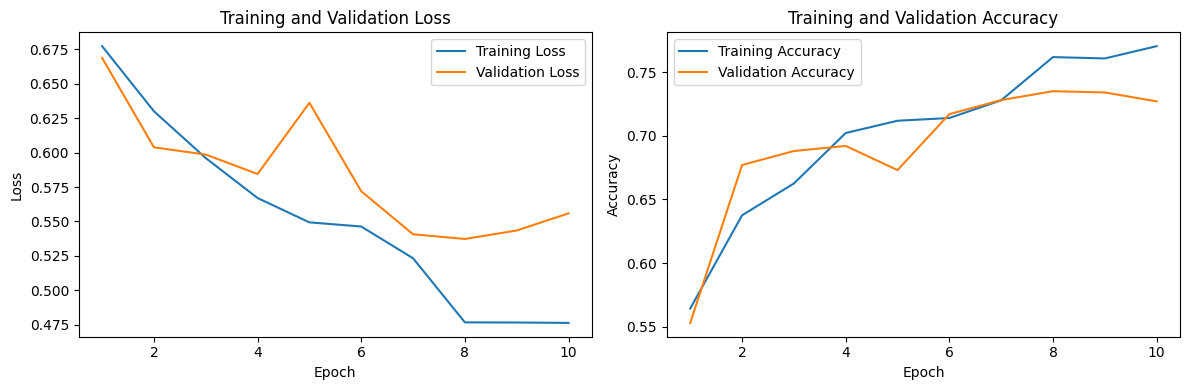

In [73]:
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = MyCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = StepLR(optimizer, step_size=7, gamma=0.1)

train(num_epoch=10, model=model, criterion=criterion, optimizer=optimizer, train_dataloader=train_dataloader, valid_dataloader=valid_dataloader, scheduler=scheduler, device=device)


In [84]:
checkpoint = torch.load('/content/checkpoint_epoch_8.pt')  # Load the saved checkpoint file

model = MyCNN().to(device)  # Create an instance of the model

# Create a new state dict that excludes unexpected keys
model_state_dict = model.state_dict()
for k in checkpoint['model_state_dict']:
    if k in model_state_dict and model_state_dict[k].shape == checkpoint['model_state_dict'][k].shape:
        model_state_dict[k] = checkpoint['model_state_dict'][k]

# Load the model state dict
model.load_state_dict(model_state_dict)

optimizer = optim.Adam(model.parameters(), lr=0.001)  # Create an instance of the optimizer
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])  # Load the optimizer's state dictionary


In [75]:
def test(test_loader, model):
    model.to(device)
    model.eval()
    test_loss = 0
    correct = 0

    true_output = []
    pred_output = []
    with torch.no_grad():
        for x, y in test_loader:
            x = x.to(device)
            y = y.to(device)
            true_output.append(y.item())

            output = model(x)
            _, predictions = torch.max(output, 1)
            pred_output.append(predictions.item())

            correct += (predictions == y).sum().item()
            test_loss += criterion(output, y)

            # Display the image, predicted label, and actual label
            for i in range(len(x)):
                if i%2 == 0:
                    image = x[i].cpu().numpy()
                    predicted_label = predictions[i].item()
                    actual_label = y[i].item()

                    plt.imshow(np.transpose(image, (1, 2, 0)))
                    plt.title(f"Predicted: {predicted_label}, Actual: {actual_label}")

                    plt.show()

    test_loss /= len(test_loader.dataset)

    print("Average Loss: ", test_loss, "  Accuracy: ", correct, " / ",
    len(test_loader.dataset), "  ", int(correct / len(test_loader.dataset) * 100), "%")

    Confusion_matrix = confusion_matrix(true_output, pred_output)
    report = classification_report(true_output, pred_output)
    F1_score = f1_score(true_output, pred_output, average='macro')

    print('F1 Score is: {}'.format(F1_score))
    print('Classification_Report Score is: {}'.format(report))


    fig = plt.figure(figsize=(15,5))
    sns.heatmap(Confusion_matrix, annot=True, cmap='Blues')
    plt.show()


In [80]:
def ImagePrediction(filepath, model):
    img_array = Image.open(filepath).convert("RGB")
    img_array.show()

    data_transforms = transforms.Compose([
    transforms.Resize((512, 512)),
    # transforms.Lambda(convert_channels),  # Custom transform to handle 4 or 1 channel images
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5341, 0.5063, 0.4630], std=[0.2098, 0.2081, 0.2181])
    ])

    img = data_transforms(img_array).unsqueeze(dim=0) # Returns a new tensor with a dimension of size one inserted at the specified position.
    load = DataLoader(img)

    for x in load:
        x=x.to(device)
        pred = model(x)
        # print(pred)
        _, preds = torch.max(pred, 1)
        print(f"class : {preds}")
        if preds[0] == 1: print(f"predicted ----> Dog")
        else: print(f"predicted ----> Cat")

        # Apply sigmoid to convert logits to probabilities
        probabilities = torch.sigmoid(pred)

        # # Apply threshold (0.5) to determine class prediction
        print(probabilities)
        predicted_class = (probabilities >= 0.5).float()

        if(torch.argmax(probabilities).item()   == 1):
          print("Dog")
        else:
          print("Cat")

In [82]:
ImagePrediction("/content/download.webp", model)

class : tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
predicted ----> Cat
tensor([[0.7811, 0.2923],
        [0.8792, 0.2376],
        [0.7914, 0.2413],
        [0.7527, 0.1799],
        [0.6833, 0.5731],
        [0.6283, 0.3776],
        [0.8642, 0.1559],
        [0.7347, 0.1922],
        [0.6557, 0.3761],
        [0.6503, 0.4726],
        [0.6176, 0.3927],
        [0.5974, 0.5219],
        [0.6733, 0.5006],
        [0.8805, 0.3739],
        [0.6647, 0.4848],
        [0.8319, 0.2618]], grad_fn=<SigmoidBackward0>)
Cat
